In [13]:
pip install pandas ta-lib yfinance

Note: you may need to restart the kernel to use updated packages.


擺動交易策略(Swing Trading)-短期價格波動進行交易的策略

1.技術指標
MA(移動平均線)-用於識別和確認趨勢
RSI(相對強弱指數)-用於判斷市場是否超買或超賣
Stochastic Osicllator(隨機指標)-用於判斷市場的買賣力道

2.
支撐位-價格下跌時預計會遇到的“支撐”水平
阻力位-價格上漲時預計會遇到的“阻力”水平

3.定義買賣點:
當MACD線在信號線之上且RSI低於30時，認為是買入信號。
當MACD線在信號線之下且RSI高於70時，認為是賣出信號。

In [27]:
import pandas as pd
import numpy as np
import talib
import yfinance as yf
import matplotlib.pyplot as plt

# 下載歷史數據
ticker='2317.TW'
data = yf.download(ticker, start='2018-01-01', end='2024-05-24')

[*********************100%%**********************]  1 of 1 completed


C:\Users\ching\AppData\Local\Temp\ipykernel_12072\1062895288.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_signals.append(data['Close'][i])
C:\Users\ching\AppData\Local\Temp\ipykernel_12072\1062895288.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sell_signals.append(data['Close'][i])


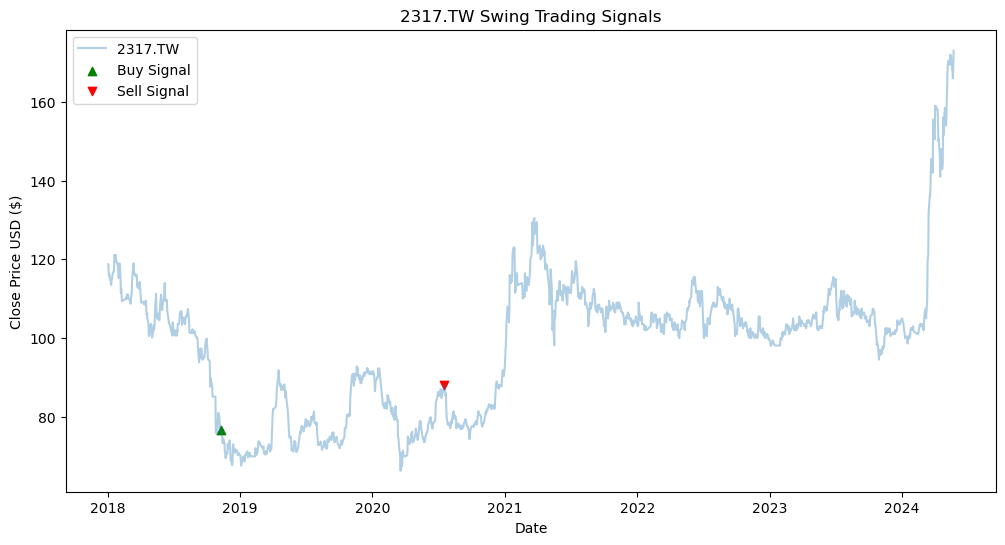

In [28]:
#計算MACD
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
# 計算RSI
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
#定義買賣點
buy_signals = []
sell_signals = []
position = None  # 用於跟蹤是否持倉

for i in range(len(data)):
    if data['MACD'].iloc[i] > data['MACD_Signal'].iloc[i] and data['RSI'].iloc[i] < 30:
        if position != 'buy':
            buy_signals.append(data['Close'][i])
            sell_signals.append(np.nan)
            position = 'buy'
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)
    elif  data['MACD'].iloc[i] < data['MACD_Signal'].iloc[i] and data['RSI'].iloc[i] > 70:
        if position == 'buy':
            buy_signals.append(np.nan)
            sell_signals.append(data['Close'][i])
            position = None
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

data['Buy_Signal_Price'] = buy_signals
data['Sell_Signal_Price'] = sell_signals

# 視覺化
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=ticker, alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell Signal', marker='v', color='red', alpha=1)
plt.title(f'{ticker} Swing Trading Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='best')
plt.show()